# Exercise 2
(with Python, _from scratch_)

---
This notebook follows the one in [Matlab_track](https://github.com/jhonsen/machinelearn_NG/tree/master/Matlab_track) which focuses on doing __logistic regression from scratch__, i.e., defining a cost function and applying gradient descent to minimize this function, to arrive at an optimum theta values

Another notebook that describes the use of __external library (scikit)__ is also available in the  parent folder [Python track](https://github.com/jhonsen/machinelearn_NG/tree/master/Python_track) 


## Section 1. 

__Section 1.1__  
- Visualizing the data 
- ex2data1.txt contains 3 columns. 1st is exam1 score, 2nd is exam2 score, and 3rd is admitted/not-assignments

Suppose that you are the administrator of a university department and
you want to determine each applicant's chance of admission based on their
results on two exams. You have historical data from previous applicants
that you can use as a training set for logistic regression. For each training example, you have the applicant's scores on two exams and the admissions decision.  
Your task is to build a classification model that estimates an applicant's
probability of admission based the scores from those two exams.  
The workflow in this notebook follows the notebook in [matlabtrack](https://github.com/jhonsen/machinelearn_NG/tree/master/Matlab_track)

In [263]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline


__Import data and check it__

In [422]:
data = np.loadtxt('ex2data1.txt',delimiter=',')

print(data.shape)
data[:5,:]

(100, 3)


array([[34.62365962, 78.02469282,  0.        ],
       [30.28671077, 43.89499752,  0.        ],
       [35.84740877, 72.90219803,  0.        ],
       [60.18259939, 86.3085521 ,  1.        ],
       [79.03273605, 75.34437644,  1.        ]])

In [423]:
X = data[:,:-1]
y = data[:,-1]
X.shape,y.shape

((100, 2), (100,))

In [424]:
# Define a function to plot dataset

def plotdataset(X, y):
    ''' function returns a plot based on columns in X (col-1 vs col-2) 
    if X is a numpy-matrix with 2 columns,
    y is anumpy-vector  
    '''
    accepted = X[y==1]
    rejected = X[y==0] 
    
    plt.plot(accepted[:,0], accepted[:,1], 'k+', label = 'admitted')
    plt.plot(rejected[:,0], rejected[:,1], 'yo', label = 'not admitted')
    
    plt.xlabel('Exam 1 Score')
    plt.ylabel('Exam 2 Score')
    plt.legend()



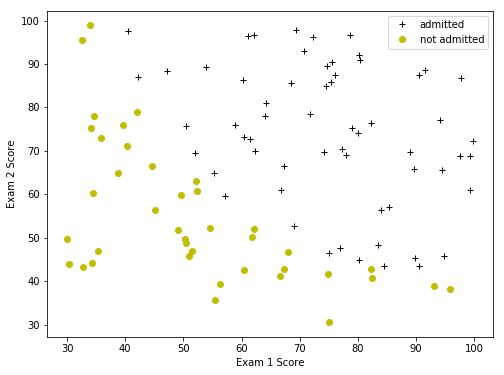

In [426]:
# Plot the dataset

plt.figure(figsize=(8,6))
plotdataset(X,y)

In [431]:
# Original x- and y-limits on the plot
minmax_X = X[:,0].min(),X[:,0].max()
minmax_Y = X[:,1].min(),X[:,1].max()
print('xlimits are:', minmax_X)
print('ylimits are:', minmax_Y)

xlimits are: (30.05882244669796, 99.82785779692128)
ylimits are: (30.60326323428011, 98.86943574220611)


__Section 1.2__  
 - Make a sigmoid function  
 - Logistic Regression hypthesis function is
 $$h_\theta(x) = g(\theta^T x)$$  
 where function g is the sigmoid function dfined as  $$g(z) = \frac{1}{(1+e^{-z})}$$  
 - So we want to create a sigmoid function where we could compute $h_\theta(x)$  for any vector, or matrix  
 - The function is saved in a script called, __sigmoid.m__

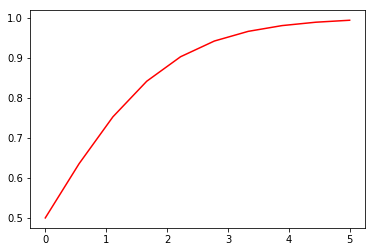

In [268]:
# Define a sigmoid function
def sigmoid(z):
    g = 1 / (1 + np.exp(-z))
    return g
    
# visualize this function 
A = np.linspace(0,5,10)
plt.plot(A, sigmoid(A), 'r-')


__Section 1.2.2.__ Cost function and gradient


- The cost function for logistic regression is  
$$J(\theta) = \frac{1}{m} \sum_{i=1}^{m} [-y^{(i)}log(h_\theta(x^{(i)})) - (1-y^{(i)})log(1-h_\theta(x^{(i)}) )] $$  
- The gradient of the cost function is a vector   
$$\frac{\delta J(\theta)}{\delta\theta_j} = \frac{1}{m} \sum_{i=1}^{m} (h_\theta(x^{(i)})-y^{(i)}) x_j^{(i)} $$  
   
- These equations are explicitly coded in __CostFunction.m__

- Apply gradient descent using thetas = [0 0 0], then thetas = [24 0.2 0.2]  

  

In [269]:
# Add intercept to first column of X, and then call it Xt

Xt = np.c_[np.ones(X.shape[0]), X]

In [298]:
Xt.shape, y.shape

((100, 3), (100,))

In [271]:
# Initialize fitting parameters, theta

initial_theta = np.zeros((Xt.shape[1], 1))
initial_theta

array([[0.],
       [0.],
       [0.]])

- Define the cost function $J(\theta)$ and the gradient $ \frac {\delta J(\theta)}{\delta \theta_j}$ (described above)

In [336]:
# define the costFunction and gradient

def costfunction(theta, X, y):
    ''' funtion returns J (scalar), grad (vector)
    
    theta = (3x1)-matrix
    X = (nx3)-matrix
    y = (nx1)-matrix
    '''
    y = y.reshape(y.shape[0],1)
    
    m = y.shape[0]
    J = (-1/m) * np.sum((y * np.log(sigmoid(Xt @ theta))) + ((1-y) * np.log( 1- sigmoid(Xt @ theta))) ) 
    
    return J
    
def gradient(theta, X, y):
    m = y.shape[0]
    y = y.reshape(y.shape[0],1)
    
    g = ((1/m) * X.T @ (sigmoid(X @ theta) - y))
    
    return g.flatten()
    

In [337]:
# Try function with initial_theta = 0 0 0

cost = costfunction(initial_theta, Xt, y)
grad = gradient(initial_theta, Xt, y)
print(grad,'\n', cost)

[ -0.1        -12.00921659 -11.26284221] 
 0.6931471805599453


__Use function to compute cost and non-zero gradient__

In [338]:
test_theta = np.array([[-24],
                       [0.2],
                       [0.2]])

In [339]:
cost = costfunction(test_theta, Xt, y)
grad =  gradient(test_theta, Xt, y)
print(grad,'\n', cost)

[0.04290299 2.56623412 2.64679737] 
 0.2183301938265978


### Optimize cost function   
- find the minimum of the cost function with parameters theta  

In [522]:
import scipy.optimize as opt

temp = opt.fmin_tnc(func = costfunction, 
                    x0 = test_theta.flatten(), fprime = gradient, 
                    args = (Xt, y.flatten()))
temp


ValueError: shapes (3,100) and (118,100) not aligned: 100 (dim 1) != 118 (dim 0)

In [363]:
import scipy.optimize as opt

y = y.reshape(100,1)    
result = opt.minimize(costfunction,
                     initial_theta.flatten(),                   
                     args = (Xt, y),
                     method = None,
                     jac = gradient,
                     options = {'maxiter':400} 
                     )
result

ValueError: shapes (3,3) and (300,) not aligned: 3 (dim 1) != 300 (dim 0)

### Make a function to predict Xvalues using optimized theta values

In [375]:
opt_theta = np.array([[-25.161],
                  [0.206],
                  [0.201]])
opt_theta.shape

(3, 1)

In [374]:
Xtest = np.array([[1, 45, 85]])
Xtest.shape

(1, 3)

In [384]:
# define a function to predict Xtest

def predict(theta, Xtest):
    ''' function returns an (n x 1)-matrix 
    Xtest = a (n x 3)-matrix
    theta = a (3 x 1)-matrix
    '''
    m = Xtest.shape[0]
    p = np.zeros((m,1))
    
    prob = sigmoid(Xtest @ theta)
    
    for row in range(0,m):
        
        if prob[row,0] >= 0.5:
            p[row,0] = 1
            
        else:
            p[row,0] = 0
            
    return p
    

In [386]:
# Testing function

predictedy = predict(opt_theta, Xtest)
predictedy

array([[1.]])

### Plot decision boundary

In [439]:
# define function to plot

def plotboundary(X, y):
    '''function returns a plot 
    X = an (n x 3)-matrix, with first column containing ones as intercept
    
    '''
    xlimval = (X[:,0].min(), X[:,0].max())
    ylimval = (X[:,1].min(), X[:,1].max())
    # plot the boundary line using contour
    # make a grid of x and y values for the contour plot
    # The value of 'step' argument in np.arange() determines the pixelation of contour lines
    X1, X2 = np.meshgrid(np.arange(xlimval[0]-3, xlimval[1]+3, step= 0.25), 
                         np.arange(ylimval[0]-3, ylimval[1]+3, step= 0.25))

    # Predict the y-values along the boundary line, Z 
    lenZ = X1.ravel().size
    Z = np.array([np.ones(lenZ), X1.ravel(), X2.ravel()]).T      #<<< makes an (n x 3)-matrix
    plt.contourf(X1,X2, predict(opt_theta, Z).reshape(X1.shape),
                alpha = 0.15, 
                cmap = 'coolwarm')
    
    # overlay the plot based on original dataset 
    plotdataset(X,y)
    
    # Apply x- and y-limits of the original dataset
    #
    plt.xlim(xlimval[0]-3, xlimval[1]+3 )
    plt.ylim(ylimval[0]-3, ylimval[1]+3 )

    plt.xlabel('Exam 1 Score')
    plt.ylabel('Exam 2 Score')   
    plt.title('Logistic Regression')



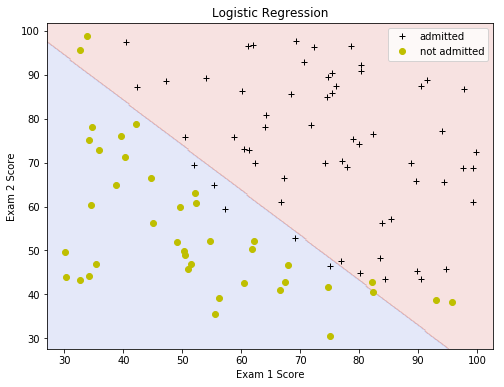

In [440]:
plt.figure(figsize=(8,6))
plotboundary(Xt[:,1:], y.flatten())

## Section 2. Regularization

Suppose you are the product manager of the factory and you have the
test results for some microchips on two diferent tests. From these two tests, you would like to determine whether the microchips should be accepted or rejected. To help you make the decision, you have a dataset of test results on past microchips, from which you can build a logistic regression model.  

In [441]:
# Loading dataset and checking it

data = np.loadtxt('ex2data2.txt', delimiter=',')
data.shape


(118, 3)

In [442]:
data[:5,:]

array([[ 0.051267,  0.69956 ,  1.      ],
       [-0.092742,  0.68494 ,  1.      ],
       [-0.21371 ,  0.69225 ,  1.      ],
       [-0.375   ,  0.50219 ,  1.      ],
       [-0.51325 ,  0.46564 ,  1.      ]])

__Splitting__ X and y and __Plotting original dataset__

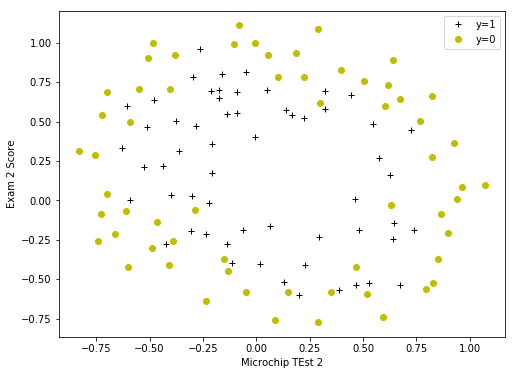

In [451]:
X = data[:,[0,1]]
y = data[:,-1]

plt.figure(figsize=(8,6))
plotdataset(X,y)

plt.xlabel('Microchip Test 1')
plt.xlabel('Microchip TEst 2')
plt.legend(['y=1','y=0'])

One way to fit the data better is to create more features from each data
point.  
In the provided function __mapFeature__, we will map the features into
all polynomial terms of x1 and x2 up to the sixth power.  
$$\mathbf{mapFeature(x)} = \left[\begin{array}
{rrr}
1  \\
x_1 \\
x_2 \\
x_1^2 \\
x_1x_2 \\
x_2^2 \\
x_1^3 \\
. \\
.\\
.\\
x_1x_2^5 \\
x_2^6 
\end{array}\right]
$$  

- Hence, our vector is transformed from 2 features to 28 features, which will fit better, (though) also more susceptible to overfitting.   


In [507]:
# define function to add polynomial terms 

def mapFeature(X1, X2):
    ''' function maps the two features X1 and X2 to 6degrees of quadratic features of themselves
    
    The output is a (n x 28)-matrix, and the 1st column is all ones (intercept)
    '''
    deg = 6
    out = np.ones((X1.shape[0], 1))
        
    for i in range(1, deg+1):
        for j in range(0,i+1):
            out = np.hstack((out, ((X1**(i-j)) * (X2**j))[:,np.newaxis] ))
    
    return out 
    
    

In [510]:
# Use the mapFeature function

Xpol = mapFeature(X[:,0], X[:,1])
Xpol.shape


(118, 28)

In [511]:
# ALTERNATIVELY, try a module in sklearn library

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(6)
XX = poly.fit_transform(X)
XX.shape


(118, 28)

__Section 2.3__ Cost function and gradient descent  

- The regularized cost function  is  
$$J(\theta) = \frac{1}{m} \sum_{i=1}^{m} [-y^{(i)}log(h_\theta(x^{(i)})) - (1-y^{(i)})log(1-h_\theta(x^{(i)}) )] + \frac{\lambda}{2m} \sum_{j=1}^n \theta_j^2$$  

- The gradient of the cost function is a vector   
-
for j=0,  
$$\frac{\delta J(\theta)}{\delta\theta_0} = \frac{1}{m} \sum_{i=1}^{m} (h_\theta(x^{(i)})-y^{(i)}) x_j^{(i)} $$  
-
for j>=1,  
$$\frac{\delta J(\theta)}{\delta\theta_0} = ( \frac{1}{m} \sum_{i=1}^{m} (h_\theta(x^{(i)})-y^{(i)}) x_j^{(i)}) + \frac{\lambda}{m}\theta_j$$  
-
- These equations are explicitly coded in the function below â†“




In [ ]:
# define costFunctionReg



In [ ]:
# define gradient